<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch05_TD_Ex4_Decathlon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 




## **Ch5 - Notebook : Statistiques bivariées :** 
## **Exercice 4 "Analyse multivariée : Décathlon"**

<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

## **Étude des variables deux à deux dans une étude multivariée.**



Les données sont importées depuis un fichier csv et stockées dans un dataFrame Pandas.

Elles récapitulent les performances aux 10 épreuves et le score final de 34 athlètes aux épreuves du décathlon des JO 1988.

**nomenclature :** (C : course, S : saut, L : lancer)
* C100 : course du 100 m
* Slong : saut en longueur
* Lpoids : lancer du poids
* Shaut : saut en hauteur
* C400 : course du 400 m
* C110 : course du 110 m haies
* Ldisque : lancer du disque
* Sperche : saut à la perche
* Ljave : lancer de javelot
* C1500 : course du 1500 m
* score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # module de graphiques avancés

In [2]:
url = "https://raw.githubusercontent.com/othoni-hub/ECG2/main/decathlon.csv"
# attention : import depuis Github : copier le "raw-github-link"
df = pd.read_csv(url, sep = " ", encoding='utf-8') # le fichier importé est un fichier .csv, séparateur virgule, converti en DataFrame Pandas
df.tail()

,C100,Slong,Lpoids,Shaut,C400,C110,Ldisq,Sperch,Ljave,C1500,Score
29,11.51,7.01,14.17,1.94,51.16,15.18,45.84,4.6,56.28,303.17,7422
30,11.52,7.36,13.93,1.94,49.99,15.64,38.82,4.6,67.04,266.42,7753
31,11.57,7.00,16.60,1.94,49.84,15.00,46.66,4.9,60.20,286.04,7860
32,11.57,7.19,10.27,1.91,50.71,16.20,34.36,4.1,54.94,269.98,6907
33,12.12,5.83,9.71,1.70,52.32,17.05,27.10,2.6,39.10,281.24,5339


* **Tri du Dataframe par ordre décroissant des scores**


In [3]:
df.sort_values(by = 'Score')
df.head()

,C100,Slong,Lpoids,Shaut,C400,C110,Ldisq,Sperch,Ljave,C1500,Score
0,10.62,7.38,15.02,2.03,49.06,14.72,44.80,4.9,64.04,285.11,8306
1,10.83,7.72,13.58,2.12,48.34,14.18,43.06,4.9,52.18,274.07,8272
2,10.87,7.45,14.97,1.97,47.71,14.46,44.36,5.1,61.76,273.02,8399
3,10.89,7.07,15.84,1.79,49.68,15.38,45.32,4.9,60.48,277.84,7781
4,10.94,7.45,15.34,1.97,49.94,14.25,41.86,4.8,66.64,295.89,8143


### **descripteurs** 

In [4]:
moyennes = df.mean()
moyennes

C100        11.223529
Slong        7.095000
Lpoids      13.850882
Shaut        1.974412
C400        49.366176
C110        15.107647
Ldisq       41.905294
Sperch       4.676471
Ljave       58.840588
C1500      276.191471
Score     7782.852941
dtype: float64

In [5]:
ecarts_types = df.std()
ecarts_types

C100        0.287232
Slong       0.373868
Lpoids      1.501927
Shaut       0.104481
C400        1.175546
C110        0.605655
Ldisq       4.500711
Sperch      0.493017
Ljave       6.438736
C1500      13.478133
Score     594.582723
dtype: float64

In [6]:
ecarts_types[2]

1.5019267779575045

In [7]:
df.describe()

,C100,Slong,Lpoids,Shaut,C400,C110,Ldisq,Sperch,Ljave,C1500,Score
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,11.223529,7.095000,13.850882,1.974412,49.366176,15.107647,41.905294,4.676471,58.840588,276.191471,7782.852941
std,0.287232,0.373868,1.501927,0.104481,1.175546,0.605655,4.500711,0.493017,6.438736,13.478133,594.582723
min,10.620000,5.830000,9.710000,1.700000,47.440000,14.180000,27.100000,2.600000,39.100000,256.640000,5339.000000
25%,11.022500,6.985000,12.992500,1.940000,48.347500,14.730000,38.885000,4.525000,55.060000,266.685000,7532.500000
50%,11.180000,7.085000,14.050000,1.970000,49.210000,15.000000,42.090000,4.700000,58.660000,272.370000,7864.500000
75%,11.452500,7.367500,14.857500,2.030000,49.987500,15.387500,44.690000,4.900000,63.750000,285.922500,8176.750000
max,12.120000,7.720000,16.600000,2.270000,52.320000,17.050000,50.660000,5.700000,72.600000,303.170000,8488.000000


### **Représentations graphiques**



* **Boite à moustaches de chacune des variables**


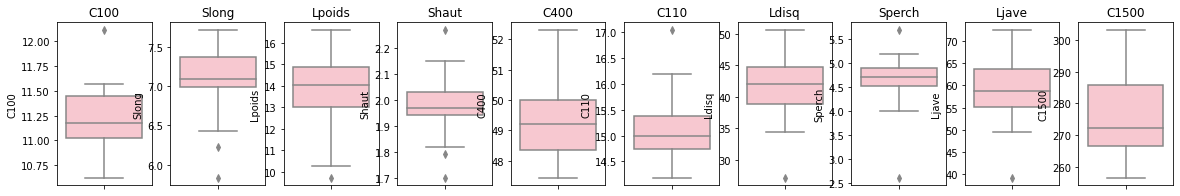

In [8]:
fig=plt.figure(figsize=(20,3))

for i in range(1,11):
    data3=plt.subplot(1,10,i,title=df.columns[i-1])
    sns.boxplot(y=df[df.columns[i-1]], color = "pink")

* ***Pair Plots***

La représentation suivante donne le nuage de point pour tous les couples de variables (séries de données).

En diagonale figurent les histogrammes de chacune des séries.

Il est facile visuellement de donner deux variables très positivement corrélées (les points du graphiques sont relativement bien alignés sur une droite de pente positive), deux variables très négativement corrélées (approximative droite descendante), ou deux variables faiblement corrélées (nuage très diffus)

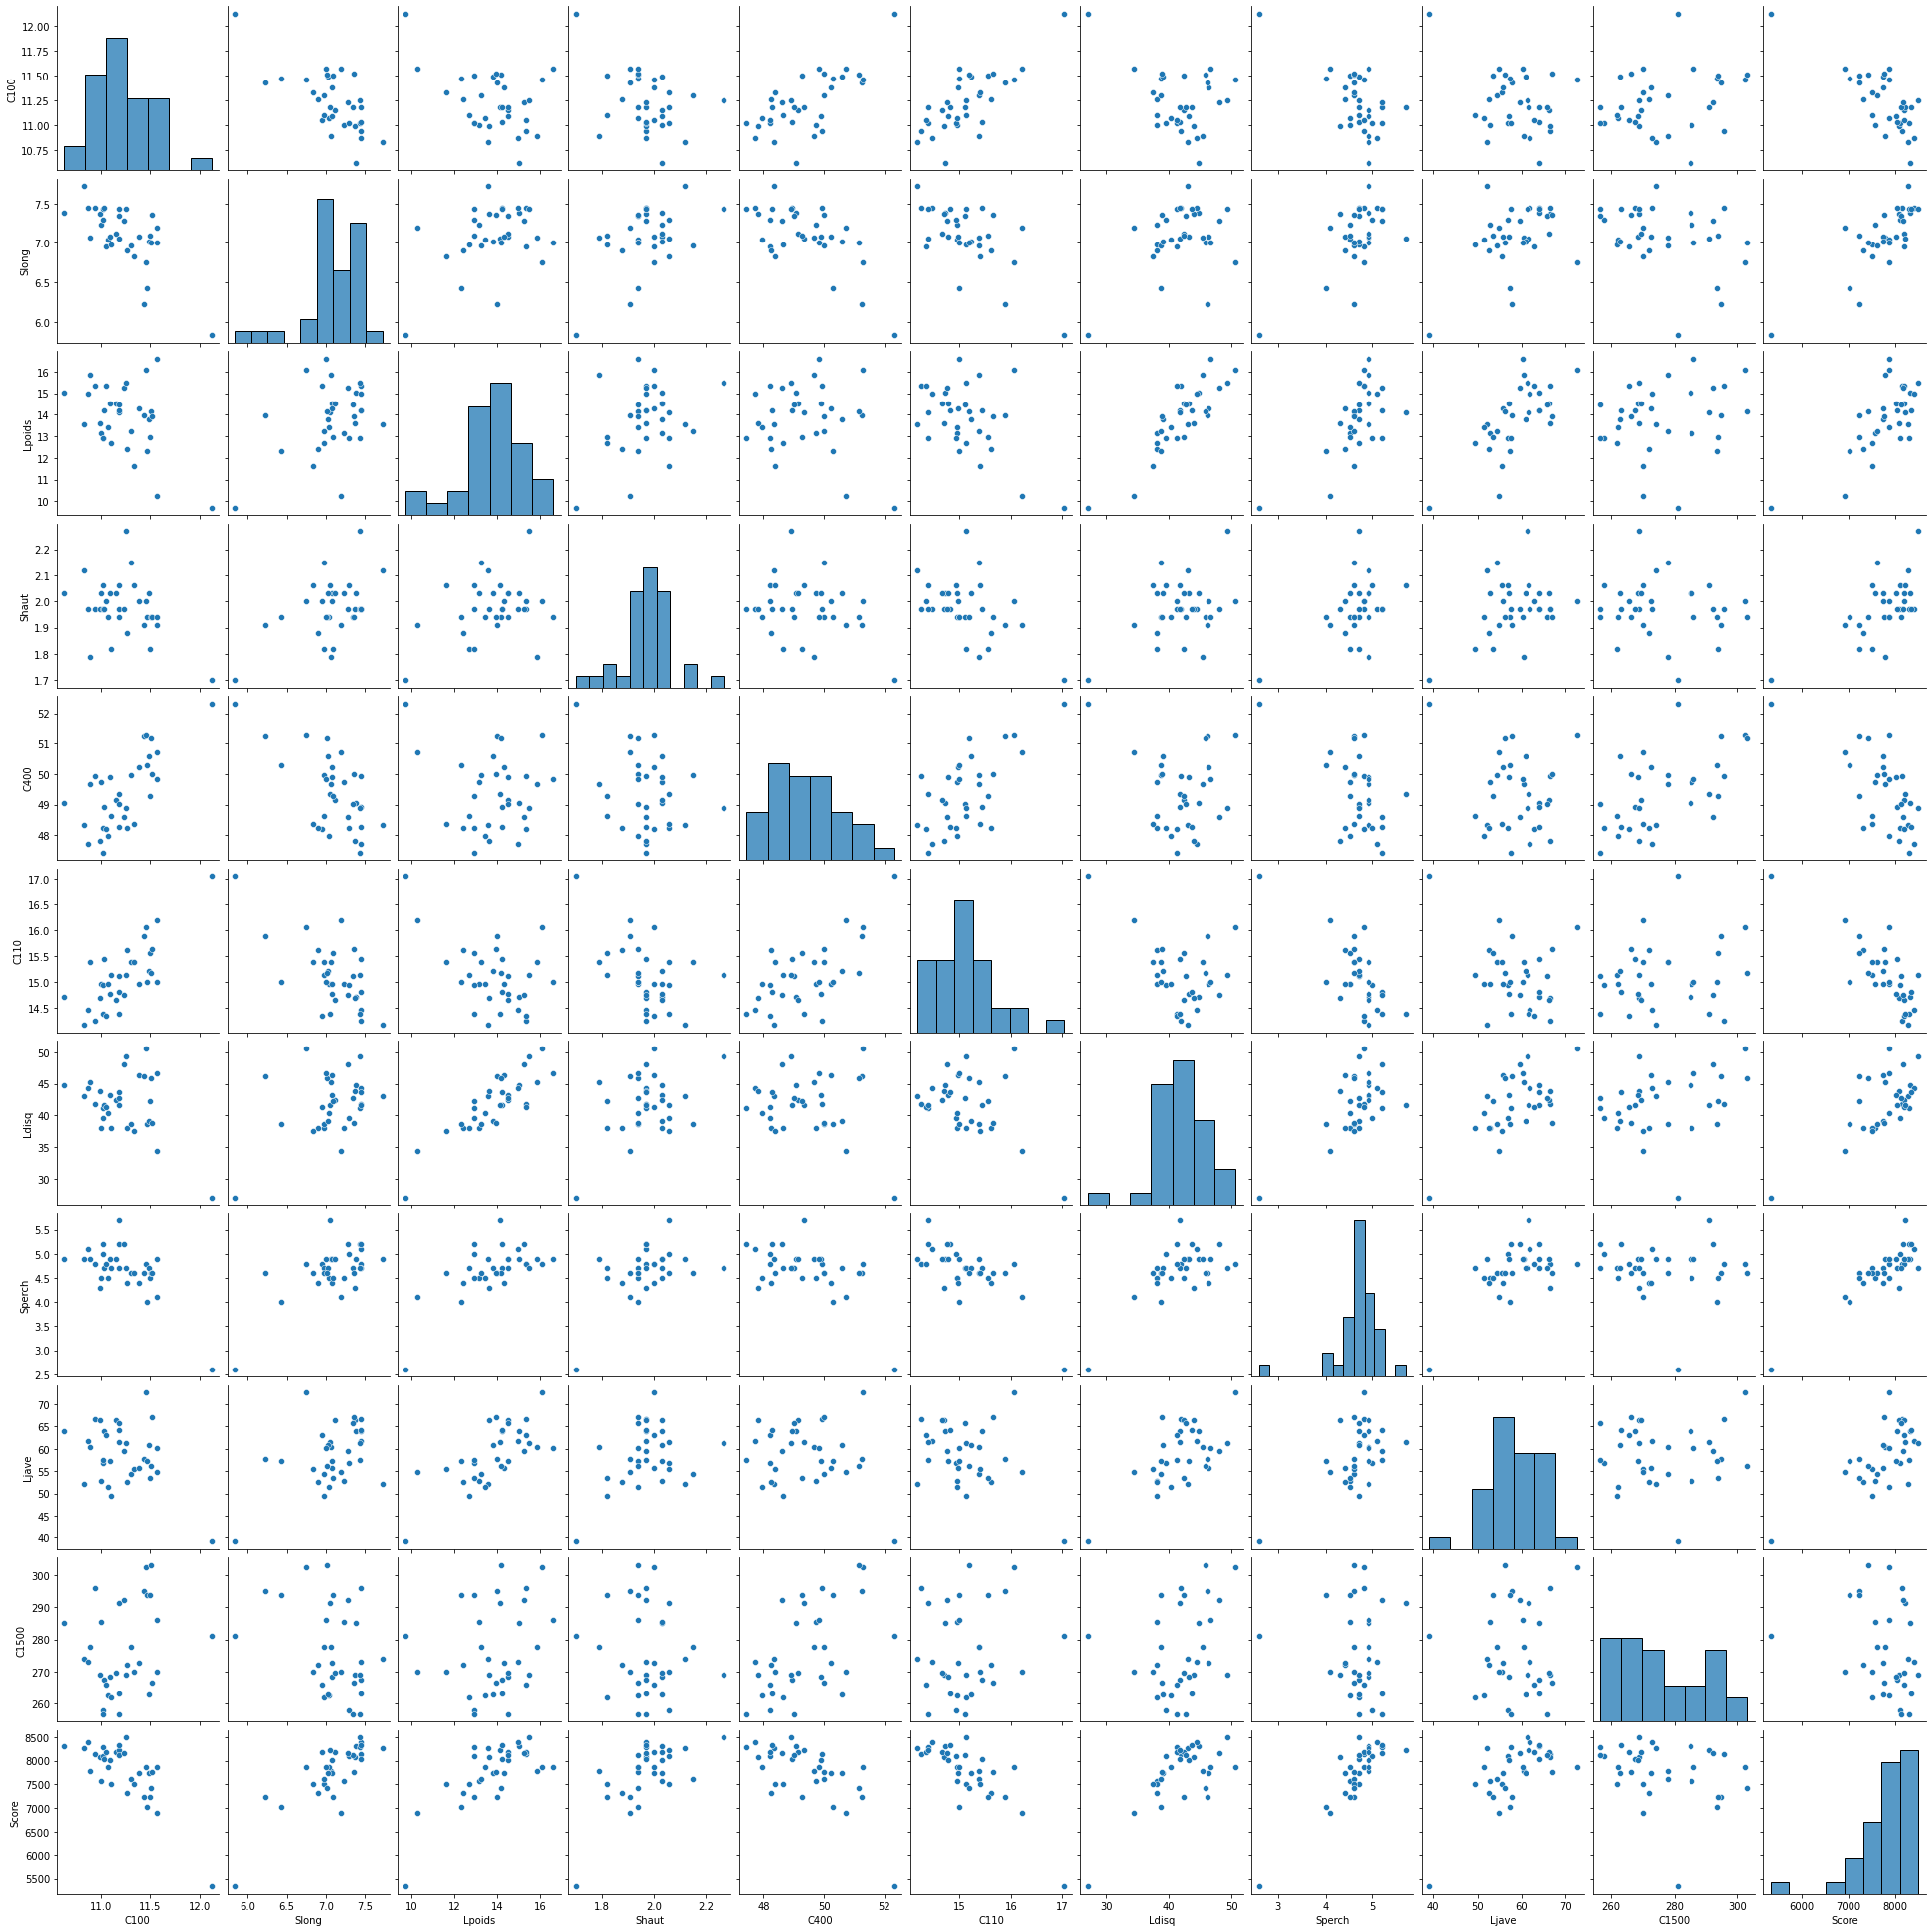

In [9]:
sns.pairplot(df)

**observations :**
* Le score (dernière ligne, dernière colonne) est sensiblement corrélé à l'ensemble des épreuves, c'est plutôt logique... Hormis pour les deux courses de sprint, 100 m et 110 m, ce qui tendrait à signifier que ce sont des exercices très spécifiques, peu avantageux pour les autres épreuves. Écartons cette variable "score" car elle n'est pas très révélatrice.

* Lancer du poids et lancer du disque semblent fortement positivement corrélés, c'est logique aussi, les morphotypes de ces deux sports sont très voisins. (c'est avec ce constat que les lanceurs de poids ont adopté ces dernières années une prise d'élan rotative, et non rectiligne, comme en 1988)

* 100 m haies et saut à la perche sont par contre fortement négativement corrélés : les efforts dans ces deux épreuves sont très différents.

* Lancer du poids et 400 m  semblent peu corrélées, certains athlètes sont très forts dans les deux, ou seulement dans l'une des deux spécialités, ... ou dans aucune, ce qui donne un nuage très diffus.

* **"*Heat Map*" (ou Matrice de confusion, *in french*)**

On donne sous forme de matrice les corrélations des variables deux à deux.

In [10]:
cor=df.corr()
cor

,C100,Slong,Lpoids,Shaut,C400,C110,Ldisq,Sperch,Ljave,C1500,Score
C100,1.000000,-0.690508,-0.420167,-0.363743,0.697733,0.751268,-0.352602,-0.627239,-0.344130,0.253774,-0.762737
Slong,-0.690508,1.000000,0.390586,0.471393,-0.635582,-0.654492,0.374849,0.632288,0.446284,-0.355977,0.801992
Lpoids,-0.420167,0.390586,1.000000,0.320514,-0.142279,-0.488844,0.856185,0.642531,0.702640,0.202015,0.716322
Shaut,-0.363743,0.471393,0.320514,1.000000,-0.275497,-0.486847,0.376005,0.471526,0.337726,-0.131551,0.634049
C400,0.697733,-0.635582,-0.142279,-0.275497,1.000000,0.654716,-0.154393,-0.521136,-0.149878,0.554456,-0.652702
C110,0.751268,-0.654492,-0.488844,-0.486847,0.654716,1.000000,-0.403459,-0.708754,-0.350491,0.155316,-0.804927
Ldisq,-0.352602,0.374849,0.856185,0.376005,-0.154393,-0.403459,1.000000,0.619522,0.617820,0.288191,0.674659
Sperch,-0.627239,0.632288,0.642531,0.471526,-0.521136,-0.708754,0.619522,1.000000,0.557131,-0.070246,0.870243
Ljave,-0.344130,0.446284,0.702640,0.337726,-0.149878,-0.350491,0.617820,0.557131,1.000000,0.044976,0.674698
C1500,0.253774,-0.355977,0.202015,-0.131551,0.554456,0.155316,0.288191,-0.070246,0.044976,1.000000,-0.255364


... la même en couleur...

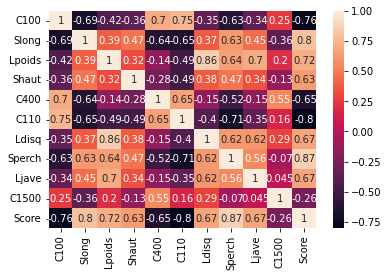

In [11]:
# correlation plot---heatmap

sns.heatmap(cor,annot=True)

**observations :**

Ceci confirme nos observations initiales, puisque la corrélation lancer poids/lancer disque est de 0.86 (proche de 1), celle entre 110 m haies et perche de -0.71 (proche de -1), et celle entre poids et 400 m : -0.14 (proche de 0).

## **Outils de calcul et graphiques**

On reconstruit ici les fonctions automatiques utilisées ci-dessus.

### **Fonctions de calcul requises**


In [12]:
def moyenne(X) :
    return 1/len(X)*sum(X)

In [13]:
def covariance(X,Y) :
    '''reçoit deux matrices colonnes de même taille et renvoie leur covariance'''
    S = 0
    Xbar = moyenne(X)
    Ybar = moyenne(Y)
    L = len(X)
    
    for i in range(L) :
        S = S + (X[i]-Xbar)*(Y[i]- Ybar)
    
    c = S/(L-1) # covariance empirique (biais multiplicatif:  (L-1)/L )
    return c

In [14]:
X = df["Lpoids"]
Y = df["Ldisq"]
covariance(X,Y)

5.787583065953654

In [15]:
def variance(X) :
    return covariance(X,X)

In [16]:
variance(df["Lpoids"])

2.255784046345811

In [17]:
from math import sqrt

In [18]:
def ecart_type(X) :
    return sqrt(variance(X))

In [19]:
ecart_type(df["Lpoids"])

1.5019267779575045

In [20]:
def correlation(X,Y) :
    return covariance(X,Y)/(ecart_type(X)*ecart_type(Y))

In [21]:
X = df["Lpoids"]
Y = df["Ldisq"]
correlation(X,Y)

0.8561845651373469

In [22]:
def coeff_droite_regression(x,y):
    '''Cette fonction reçoit deux listes x et y de même taille,
    et renvoie les coefficients de la droite d'ajustemennt de y en x'''
    xbar = np.mean(x)
    ybar = np.mean(y)

    # pente
    a = covariance(x, y) / covariance(x, x)
    # ordonnée à l'origine
    b = ybar - a * xbar
    return a, b

In [23]:
X = df["Lpoids"]
Y = df["Ldisq"]

a,b = coeff_droite_regression(X, Y)
print('Équation de la droite de régression de z en x : z=' + str(a) + '.x + ' + str(b))

Équation de la droite de régression de z en x : z=2.565663621625959.x + 6.3685891372849


### **Fonctions de représentation graphique**

In [24]:
def centrax(xmin, xmax, ymin, ymax, titre, legende = [], axe_x = "", axe_y = ""):
    '''Cette procédure ajuste les paramètres graphiques : fenêtre (xmin, xmax, ymin, ymax), titre, légende (vide par défaut)'''
    # ajustement des paramètres des axes (centrage, couleur, etc.)
    ax = plt.gca()
    #ax.spines['left'].set_position('zero')
    #ax.spines['right'].set_color('none')
    #ax.spines['bottom'].set_position('zero')
    #ax.spines['top'].set_color('none')
    ax.legend(legende, loc = 'best')

    plt.xlim(xmin,xmax)   
    plt.ylim(ymin,ymax)         # fenêtre d'affichage
    plt.title(titre)            # titre du graphique au format LaTeX (encadré par des $)
    plt.xlabel(axe_x)           # nom des axes
    plt.ylabel(axe_y)

    plt.show()

In [25]:
def nuage_de_points(X,Y, nom_X, nom_Y) :
    '''entrées : deux séries pandas, deux chaînes
    sortie : affichage du nuage de points légendé'''
    # paramètres graphiques
    xmin = X.min()
    xmax = X.max()
    ymin = Y.min()
    ymax = Y.max()
    
    titre = "Nuage de points " + nom_X + " vs " + nom_Y
    axe_x = nom_X
    axe_y = nom_Y

    # nuage de points
    legende = ['droite de régression','nuage','point moyen' ]
    plt.scatter(X,Y,marker ='+',color = 'red')     # représentation graphique du nuage de points 

    # point moyen
    xbar = X.mean()
    ybar = Y.mean()
    plt.scatter(xbar, ybar, marker = 'v', color = 'blue')

    # droite de régression
    a,b = coeff_droite_regression(X, Y)
    y_aju_min = a*xmin + b
    y_aju_max = a*xmax + b
    plt.plot([xmin,xmax],[y_aju_min,y_aju_max], color = 'blue', linewidth = 0.5)

    centrax(xmin, xmax, ymin, ymax, titre, legende , axe_x , axe_y )

## **Études des variables deux à deux**

### **Étude bivariée de deux séries à forte corrélation positive : étude du couple "poids/disque"**

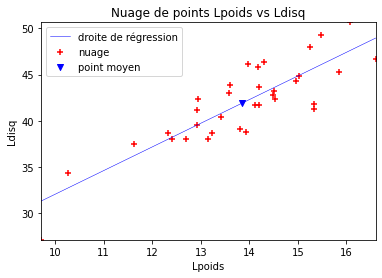

In [26]:
nom_X = "Lpoids"
nom_Y = "Ldisq"

X = df[nom_X]
Y = df[nom_Y]

nuage_de_points(X,Y, nom_X, nom_Y)     # représentation graphique du nuage de points y

In [27]:
correlation(X,Y)

0.8561845651373469

### **Étude bivariée de deux séries à forte corrélation négative : étude du couple "110 m haies/saut à la perche"**

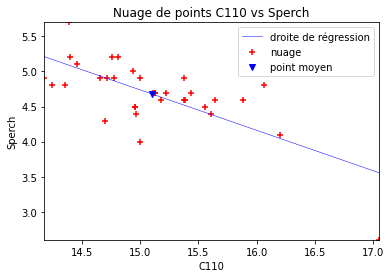

In [28]:
nom_X = "C110"
nom_Y = "Sperch"

X = df[nom_X]
Y = df[nom_Y]

nuage_de_points(X,Y, nom_X, nom_Y)     # représentation graphique du nuage de points y

In [29]:
correlation(X,Y)

-0.7087535893770353

### **Étude bivariée de deux séries peu corrélées : étude du couple "poids/400 m"**

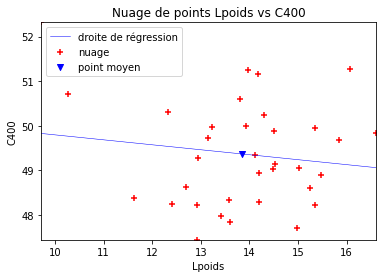

In [30]:
nom_X = "Lpoids"
nom_Y = "C400"

X = df[nom_X]
Y = df[nom_Y]

nuage_de_points(X,Y, nom_X, nom_Y)     # représentation graphique du nuage de points y

In [31]:
correlation(X,Y)

-0.1422790088776891

# **Analyse en Composantes Principales (ACP)** 
... hors programme, pour le fun... 

Quoique... Cela n'utilise que des notions au programme : calcul de valeurs propres, de vecteurs propres, de sous-espaces propres, et une vue dans un plan constitué d'une base de vecteurs propres associés aux deux valeurs propres les plus fortes...

L'idée est d'observer le nuage de points sous un angle où il sera le plus dispersé possible, afin de mieux faire apparaître les proximités entre les variables, entre les individus, et ansi de dégager des "profils".

* **Matrice de corrélation**

...et si on la reconstruisait algorithmiquement ?

In [32]:
cor = [[0 for j in range(10)] for i in range(10)]
for i in range(10):
    for j in range(10) :
        X = df.iloc[:,i]
        Y = df.iloc[:,j]
        cor [i][j] = correlation(X,Y)
cor = np.matrix(cor)
#cor

**Rappel :**

Le sous-module **"*linAlg*"** de **"*NumPy*"** permet de diagonaliser une matrice.

Si A est un objet de type matrice de NumPy, la méthode **A.eig()** permet de diagonaliser A, on obtient une liste de deux éléments : le premier est un *array* à une dimension avec les valeurs propres, le second est un *array* à deux dimensions correspondant à la matrice de passage.


In [33]:
import numpy.linalg as alg
np.set_printoptions(precision=2, suppress=True) # affichera les objets NumPy avec deux décimales, sans notation scientifique

In [34]:
L = alg.eig(cor)
print('Liste des valeurs propres : ')
spectre =  L[0]
spectre

Liste des valeurs propres : 


array([5.02, 2.08, 0.74, 0.69, 0.08, 0.38, 0.2 , 0.22, 0.29, 0.3 ])

In [35]:
trace = sum(spectre)
trace

10.000000000000004

In [36]:
D = np.diag(spectre)
D

array([[5.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 2.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.74, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.69, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.38, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.29, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.3 ]])

In [37]:
P = np.matrix(L[1])
P

matrix([[-0.36,  0.2 ,  0.3 , -0.18,  0.1 , -0.27, -0.57,  0.16, -0.51,
         -0.11],
        [ 0.36, -0.2 ,  0.08, -0.11,  0.09,  0.46, -0.14,  0.25, -0.37,
          0.61],
        [ 0.32,  0.39, -0.13, -0.17,  0.62, -0.27,  0.  ,  0.39,  0.29,
          0.04],
        [ 0.27, -0.01,  0.86,  0.36,  0.14, -0.07,  0.05, -0.15,  0.15,
         -0.01],
        [-0.29,  0.43,  0.23,  0.02, -0.34,  0.29,  0.37,  0.58,  0.06,
         -0.  ],
        [-0.37,  0.13,  0.15, -0.39,  0.31, -0.05,  0.49, -0.42, -0.13,
          0.37],
        [ 0.31,  0.42, -0.05, -0.04, -0.55, -0.45, -0.08, -0.19,  0.01,
          0.43],
        [ 0.39,  0.06, -0.08,  0.07,  0.01, -0.16,  0.47,  0.03, -0.66,
         -0.38],
        [ 0.29,  0.3 ,  0.14, -0.57, -0.11,  0.45, -0.17, -0.3 ,  0.1 ,
         -0.37],
        [-0.08,  0.55, -0.23,  0.57,  0.22,  0.36, -0.14, -0.31, -0.15,
          0.07]])

In [38]:
A = (P @ D) @ alg.inv(P)
A

matrix([[ 1.  , -0.69, -0.42, -0.36,  0.7 ,  0.75, -0.35, -0.63, -0.34,
          0.25],
        [-0.69,  1.  ,  0.39,  0.47, -0.64, -0.65,  0.37,  0.63,  0.45,
         -0.36],
        [-0.42,  0.39,  1.  ,  0.32, -0.14, -0.49,  0.86,  0.64,  0.7 ,
          0.2 ],
        [-0.36,  0.47,  0.32,  1.  , -0.28, -0.49,  0.38,  0.47,  0.34,
         -0.13],
        [ 0.7 , -0.64, -0.14, -0.28,  1.  ,  0.65, -0.15, -0.52, -0.15,
          0.55],
        [ 0.75, -0.65, -0.49, -0.49,  0.65,  1.  , -0.4 , -0.71, -0.35,
          0.16],
        [-0.35,  0.37,  0.86,  0.38, -0.15, -0.4 ,  1.  ,  0.62,  0.62,
          0.29],
        [-0.63,  0.63,  0.64,  0.47, -0.52, -0.71,  0.62,  1.  ,  0.56,
         -0.07],
        [-0.34,  0.45,  0.7 ,  0.34, -0.15, -0.35,  0.62,  0.56,  1.  ,
          0.04],
        [ 0.25, -0.36,  0.2 , -0.13,  0.55,  0.16,  0.29, -0.07,  0.04,
          1.  ]])

**Remarque**

Les valeurs propres ont été rangées dans l'ordre décroissant, ce qui nous arrange beaucoup : on n'a besoin que des deux valeurs propres les plus grandes.

In [39]:
def composante_principale(i) :
    print('Composante principale n°: ' + str(i))
    Lambda = D[i-1,i-1]
    poids = Lambda/trace*100 
    poids_total = sum([D[k,k] for k in range(i)])/trace*100 # poids de la i-ème valeur propre dans la variance du nuage
    print('valeur propre n°'+str(i)+' : ' + str(Lambda))
    print('Cette composante représente '+ str(poids) +' % de la variance globale')
    print('Poids total représenté : ' + str(poids_total) + ' %.')
    print("Vecteur directeur de l'axe factoriel n°"+ str(i))
    print(P[:,i-1])

In [40]:
composante_principale(1)

Composante principale n°: 1
valeur propre n°1 : 5.023517593639252
Cette composante représente 50.23517593639251 % de la variance globale
Poids total représenté : 50.23517593639251 %.
Vecteur directeur de l'axe factoriel n°1
[[-0.36]
 [ 0.36]
 [ 0.32]
 [ 0.27]
 [-0.29]
 [-0.37]
 [ 0.31]
 [ 0.39]
 [ 0.29]
 [-0.08]]


In [41]:
composante_principale(2)

Composante principale n°: 2
valeur propre n°2 : 2.0799014294695373
Cette composante représente 20.799014294695365 % de la variance globale
Poids total représenté : 71.03419023108788 %.
Vecteur directeur de l'axe factoriel n°2
[[ 0.2 ]
 [-0.2 ]
 [ 0.39]
 [-0.01]
 [ 0.43]
 [ 0.13]
 [ 0.42]
 [ 0.06]
 [ 0.3 ]
 [ 0.55]]


* **Représentation dans le plan factoriel des deux composantes principales**

Dans la base de vecteurs propres, les coordonnées de chaque point s'obtiennent en multipliant le vecteur-ligne des coordonnées initiales à droite par la matrice de passage P.

In [42]:
def coordonnes_factorielles(X) :
    '''X est un vecteur ligne, on renvoie le vecteur colonne de X par P'''
    return X @ P


In [43]:
athlete = df.loc[2 , 'C100' : 'C1500' ] # récupération des 10 performances du 3ème athlète, sauf score (dernière colonne)
athlete

C100       10.87
Slong       7.45
Lpoids     14.97
Shaut       1.97
C400       47.71
C110       14.46
Ldisq      44.36
Sperch      5.10
Ljave      61.76
C1500     273.02
Name: 2, dtype: float64

In [44]:
perf = np.matrix(athlete)
perf

matrix([[ 10.87,   7.45,  14.97,   1.97,  47.71,  14.46,  44.36,   5.1 ,
          61.76, 273.02]])

In [45]:
perf_normalisees = [(perf[0,k]-moyennes[k])/ecarts_types[k] for k in range(10)]
perf_normalisees

[-1.230814140567624,
 0.9495330197924778,
 0.7451213091631063,
 -0.042225461875088306,
 -1.4088568223060574,
 -1.0693324831458892,
 0.5454040779791006,
 0.8590560671191353,
 0.45341380351163535,
 -0.2353048939308941]

In [46]:
# Coordonnées de l'athlète dans le plan factoriel
coord_factorielles = perf_normalisees @ P
coord_factorielles

matrix([[ 2.48, -0.6 , -0.89, -0.  ,  0.17, -0.03, -0.15, -0.17,  0.06,
          0.07]])

In [47]:
coord_plan_factoriel = [coord_factorielles[0,0],coord_factorielles[0,1]]
coord_plan_factoriel

[2.4825334008376636, -0.6000929998845775]

Reste à faire la même chose pour tous les athlètes, et les positionner dans le plan factoriel

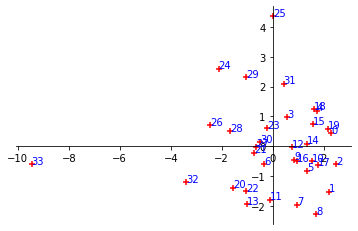

In [53]:
n = len(df)
x = []
y = []

for i in range(n) :
    athlete = df.loc[i , 'C100' : 'C1500' ]
    perf = np.matrix(athlete)
    perf_normalisees = [(perf[0,k]-moyennes[k])/ecarts_types[k] for k in range(10)]

    coord_factorielles = perf_normalisees @ P
    coord_plan_factoriel = [coord_factorielles[0,0],coord_factorielles[0,1]]
    x.append(coord_plan_factoriel[0])
    y.append(coord_plan_factoriel[1])
plt.scatter(x,y, marker = '+', color = 'red' )

etiquettes = list(range(n))
for i, label in enumerate(etiquettes):
    plt.annotate(label, (x[i], y[i]), color = 'blue')

# paramétrages graphiques
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

* **Projection des variables dans le plan factoriel**

On imagine un sportif qui ferait uniquement une épreuve, de manière optimale, par exemple, le lancer du poids, 3ème épreuve (donc d'indice 2...).
Son vecteur de performance normalisé serait donc : (0,0,1,0,0,0,0,0,0,0).
Faisons-le apparaître dans le plan factoriel, en multipliant à droite par P, comme précédemment...

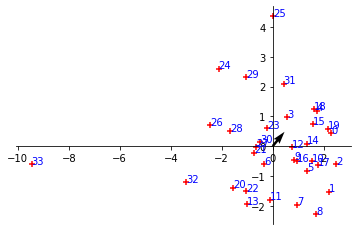

In [70]:
plt.scatter(x,y, marker = '+', color = 'red' )
for i, label in enumerate(etiquettes):
    plt.annotate(label, (x[i], y[i]), color = 'blue')

perf_normalisee =np.matrix ( [[0,0,1,0,0,0,0,0,0,0]])
coord_factorielles = perf_normalisee @ P
coord_plan_factoriel = [coord_factorielles[0,0],coord_factorielles[0,1]]
xx = coord_factorielles[0,0]
yy = coord_factorielles[0,1]
plt.quiver(0,0,xx,yy)

# paramétrages graphiques
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

Le problème, souvenons-nous, est qu'on a dessiné un espace à 10 dimensions dans un espace à deux dimensions... On est victime de forts effets de parallaxe : le point n° 20 paraît parfaitement aligné avec la flèche, ce n'est pas du tout le cas dans la réalité (ça voudrait dire que cet athlète est très faible en lancer du poids, et n'aurait pas fait les autres épreuves...

* **Analyse finale**

Rappelons que les athlètes ont été classés au départ par ordre décroissant des scores.
Rappelons aussi qu'on a ramené l'observation du nuage de points dans un espace à 10 dimensions à un espace à 2 dimensions. On a donc forcément perdu de l'information, mais c'est dans ce plan que la perte d'informations est minimale.

On s'aperçoit que les meilleurs des athlètes sont plutôt à abscisses positives sur le 1er axe factoriel, et à ordonnées négatives sur le 2nd.

Une étude plus approfondie de la contribution de chaque variable aux deux axes du plan factoriel permettrait d'aller un peu plus loin dans l'analyse : cela permettrait de savoir quelles variables sont plutôt prises en compte pour le 1er axe et lesquelles pour le 2nd.

On peut imaginer que la capacité à courir est plutôt bien représentée sur le 1er axe : à droite les meilleurs coureurs, à gauche les moins bons, ce qui correspondrait sûrement aux meilleurs lanceurs. La dispersion est très bonne sur cet axe.
Le 2nd axe serait plutôt celui des sauteurs, on a vu qu'il était peu corrélé aux coureurs et aux lanceurs. La dispersion est également très bonne sur cet axe (mais un peu moins que pour le 1er), c'était le but...



In [71]:
df.describe()

,C100,Slong,Lpoids,Shaut,C400,C110,Ldisq,Sperch,Ljave,C1500,Score
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,11.223529,7.095000,13.850882,1.974412,49.366176,15.107647,41.905294,4.676471,58.840588,276.191471,7782.852941
std,0.287232,0.373868,1.501927,0.104481,1.175546,0.605655,4.500711,0.493017,6.438736,13.478133,594.582723
min,10.620000,5.830000,9.710000,1.700000,47.440000,14.180000,27.100000,2.600000,39.100000,256.640000,5339.000000
25%,11.022500,6.985000,12.992500,1.940000,48.347500,14.730000,38.885000,4.525000,55.060000,266.685000,7532.500000
50%,11.180000,7.085000,14.050000,1.970000,49.210000,15.000000,42.090000,4.700000,58.660000,272.370000,7864.500000
75%,11.452500,7.367500,14.857500,2.030000,49.987500,15.387500,44.690000,4.900000,63.750000,285.922500,8176.750000
max,12.120000,7.720000,16.600000,2.270000,52.320000,17.050000,50.660000,5.700000,72.600000,303.170000,8488.000000


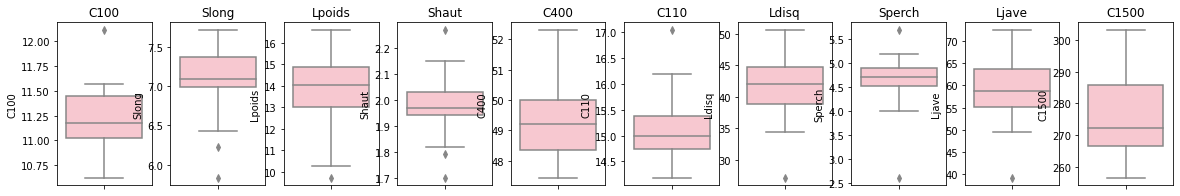

In [72]:
fig=plt.figure(figsize=(20,3))

for i in range(1,11):
    data3=plt.subplot(1,10,i,title=df.columns[i-1])
    sns.boxplot(y=df[df.columns[i-1]], color = "pink")

Les althlètes 25 et 11 nous donnent des informations sur le 2nd axe : le 25 y est positionné positivement, le 11 négativement et ils n'interviennent pas du tout sur le 1er axe.
Voyons leurs points forts/faibles/médiocres...

In [73]:
df.loc[25]

C100        11.46
Slong        6.75
Lpoids      16.07
Shaut        2.00
C400        51.28
C110        16.06
Ldisq       50.66
Sperch       4.80
Ljave       72.60
C1500      302.42
Score     7869.00
Name: 25, dtype: float64

Cet athlète est faible en 400 m, 1500 m et en saut en longueur, très bon en sauts verticaux, très bon en lancers.

In [74]:
df.loc[11]

C100        11.07
Slong        7.04
Lpoids      13.41
Shaut        1.94
C400        47.97
C110        14.96
Ldisq       40.38
Sperch       4.50
Ljave       51.50
C1500      262.41
Score     7859.00
Name: 11, dtype: float64

Celui-ci est fort en 400 m et 1500 m, médiocre dans les autres courses de sprint, moyen en saut en longueur, plutôt faible en saut à la perche, et en lancers.

On pourrait donc déduire que le 2nd axe place positivement ceux qui sont bons en lancers et plus faibles en courses de résistance ou d'endurance, et inversement, et qu'il prend peu en compte la capacité en courses de sprint et en saut en longueur.

Les épreuves où nos deux 1ers compères étaient plutôt médiocres devraient être importantes sur le 1er axe.

Sur ce 1er axe, le n°33 n'est pas intéressant, car il a terminé bon dernier dans la quasi-totalité des épreuves...

Voyons du côté des numéros 2 et 26. Si notre interprétation du 2ème axe est correcte, ils devraient se valoir en 400 m, 1500 m et lancers, et ils devraient être nettement séparés en course de sprint


In [75]:
df.loc[2]

C100        10.87
Slong        7.45
Lpoids      14.97
Shaut        1.97
C400        47.71
C110        14.46
Ldisq       44.36
Sperch       5.10
Ljave       61.76
C1500      273.02
Score     8399.00
Name: 2, dtype: float64

In [76]:
df.loc[26]

C100        11.47
Slong        6.43
Lpoids      12.33
Shaut        1.94
C400        50.30
C110        15.00
Ldisq       38.72
Sperch       4.00
Ljave       57.26
C1500      293.72
Score     7016.00
Name: 26, dtype: float64

Le n°2 est en effet très bon en sprint, et en saut en longueur (on sait bien que les deux vont de pair, voir par exemple les performance de Carl Lewis), contrairement au n°26. On pourrait ajouter aussi, comme critère positif pour l'axe 1, le saut à la perche (qui nécessite aussi une grande tonicité dans la course d'élan)

Il y a bien entendu, des outils mathématiques pour déterminer la proportion de collaboration de chacune des variables aux différents axes, mais ils sortent très nettement de notre programme d'ECG2...

Il reste donc du pain sur la planche : visualisation des variables dans le plan factoriel, contribution de chaque athlète à chacune de ces variables, etc.